In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from modules.selection import StackSelector, MultiPathSelector
from matplotlib.backends.backend_pdf import PdfPages

%reload_ext autoreload
%autoreload 2

In [2]:
# Load paths to each set of experiments
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/'
control_genotype = 'w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
mutant_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/'
mutant_genotype = 'w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
experiments = dict(control=Experiment(os.path.join(control_path, control_genotype)),
                   mutant=Experiment(os.path.join(mutant_path, mutant_genotype)))

In [3]:
exp = experiments['mutant']

In [4]:
stack = exp[exp.disc_names.index(42)]
layer = stack[3]
print(stack.disc_name)
%matplotlib notebook 

42


<IPython.core.display.Javascript object>


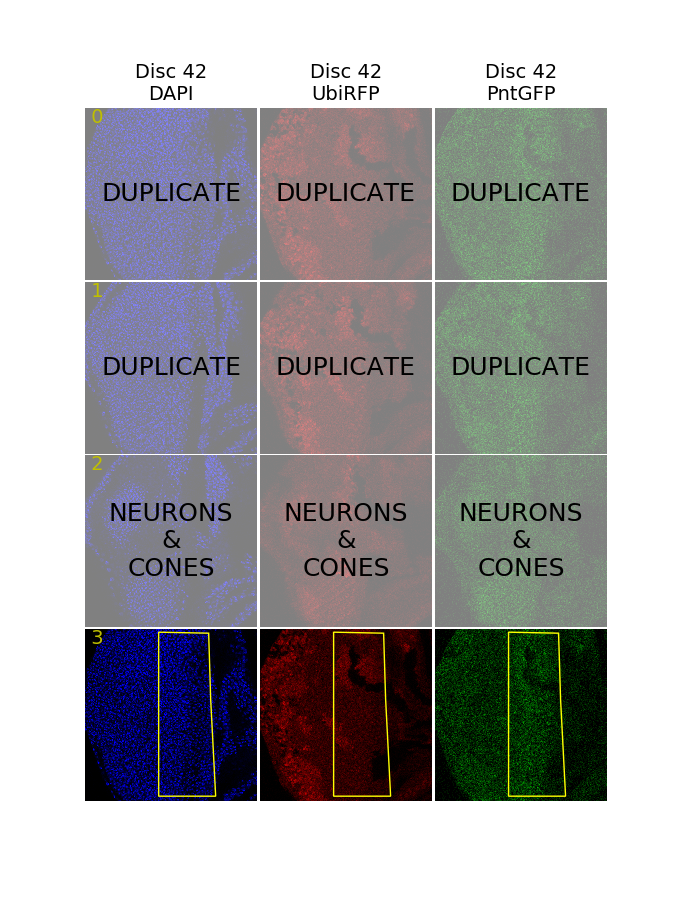

In [5]:
sel = StackSelector.load(stack)
sel.connect()

<IPython.core.display.Javascript object>


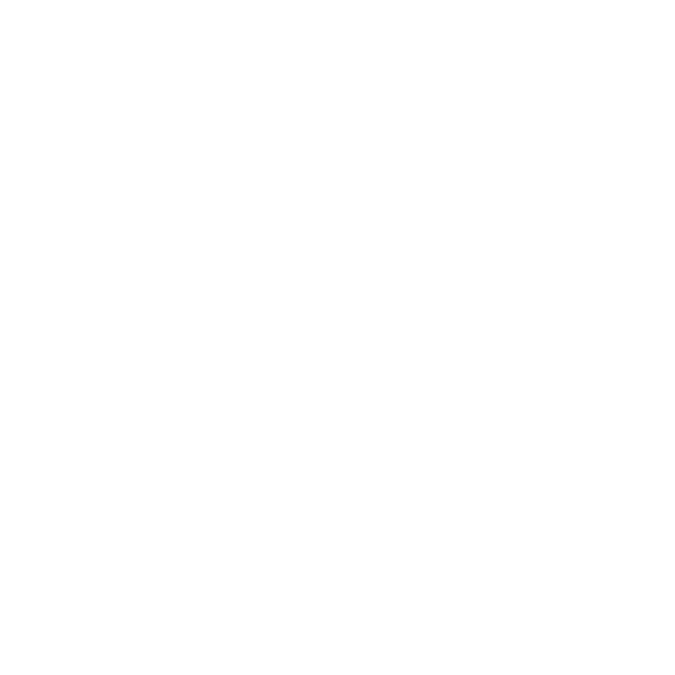

<IPython.core.display.Javascript object>


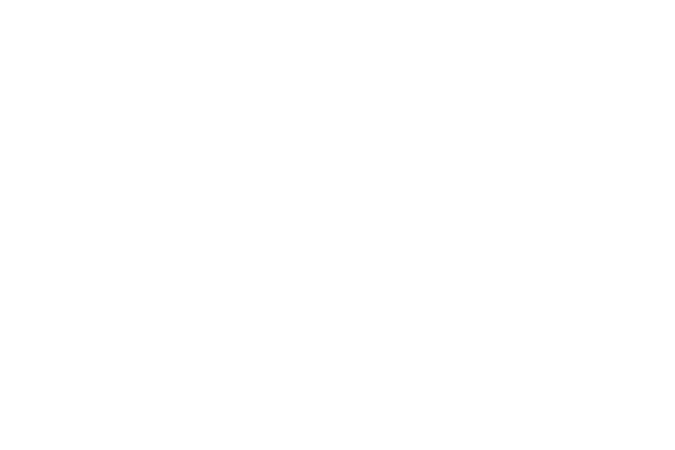

<IPython.core.display.Javascript object>

In [ ]:
# write all images to PDF
for exp_name, exp in experiments.items():    
    with PdfPages(exp_name+'.pdf') as pdf:
        for stack in exp:
            sel = StackSelector.load(stack)
            pdf.savefig(sel.fig, dpi=150)
            sel.fig.clf()
            plt.close(sel.fig)